In [15]:
isLocalServer = False
sys_path_to_be_added = '/notebook/personal/ksuchoi216/temp_experiment_analysis/'
config_path = './configs/config.json'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os

def checkLocalServer(isLocalServer, sys_path_to_be_added=None):
    print('='*60)
    print(f'isLocalServer is {isLocalServer}')
    print('='*60)
    
    if isLocalServer is True:
        if sys_path_to_be_added not in sys.path:
            sys.path.insert(0, sys_path_to_be_added)
            os.chdir(sys_path_to_be_added)
 
checkLocalServer(isLocalServer, sys_path_to_be_added)

!pwd
print('='*60)

import configparser

cfg = configparser.ConfigParser()
cfg.read('./configs/config.ini')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
isLocalServer is False
/Volumes/ssd/code/temp_experiment_analysis


['./configs/config.ini']

# FSR Distribution

Copyright © 2022 Algorigo Inc. All Rights Reserved.


In [16]:
import os
import sys
import time
from datetime import datetime
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_preprocessing import get_data_path
from data_preprocessing import convert_df_withoutKey
from data_preprocessing import calculate_statistics
from data_preprocessing import plotEachFSR

## FSR 80 vs 25

./data/fsr21v_80/test1/fsr.csv
values: (271501, 32)
selected_FSR: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30]
np mean:
  [ 1994.968  2511.834  3653.722  3746.178  3850.32   3965.     4158.618
  4185.89   4573.23   4604.692  5049.412  5095.692  5149.644  5158.024
  5203.596  5428.388  5853.024  7347.656  7366.184  8025.1    8187.04
  9297.296  9406.852  9421.12   9714.886 10046.176 10734.744 10920.678
 11295.558 11656.51  11913.858 12238.804]
ascending sort FSR:
 [ 8  4 21 17  5 20  7 24  1 12  6 22 18  3 23 19  2 11 29  9 10 30 16 28
 25  0 13 31 15 27 14 26]
np min:
  [  340.   548.  2008.  2192.  2192.  2284.  2480.  2688.  2828.  2864.
  2924.  3280.  3328.  3572.  3716.  3900.  4252.  5676.  5872.  6580.
  6600.  7496.  7552.  7664.  8112.  8352.  9056.  9440.  9680. 10060.
 10460. 10752.]
ascending sort FSR:
 [ 4  8 17 21  5 20  7 24 12  1 22  6 23  3 18 19  2 29 11 10  9 16 30 28
 25  0 13 31 15 27 14 26]
np max:
  [ 3484.  4200.

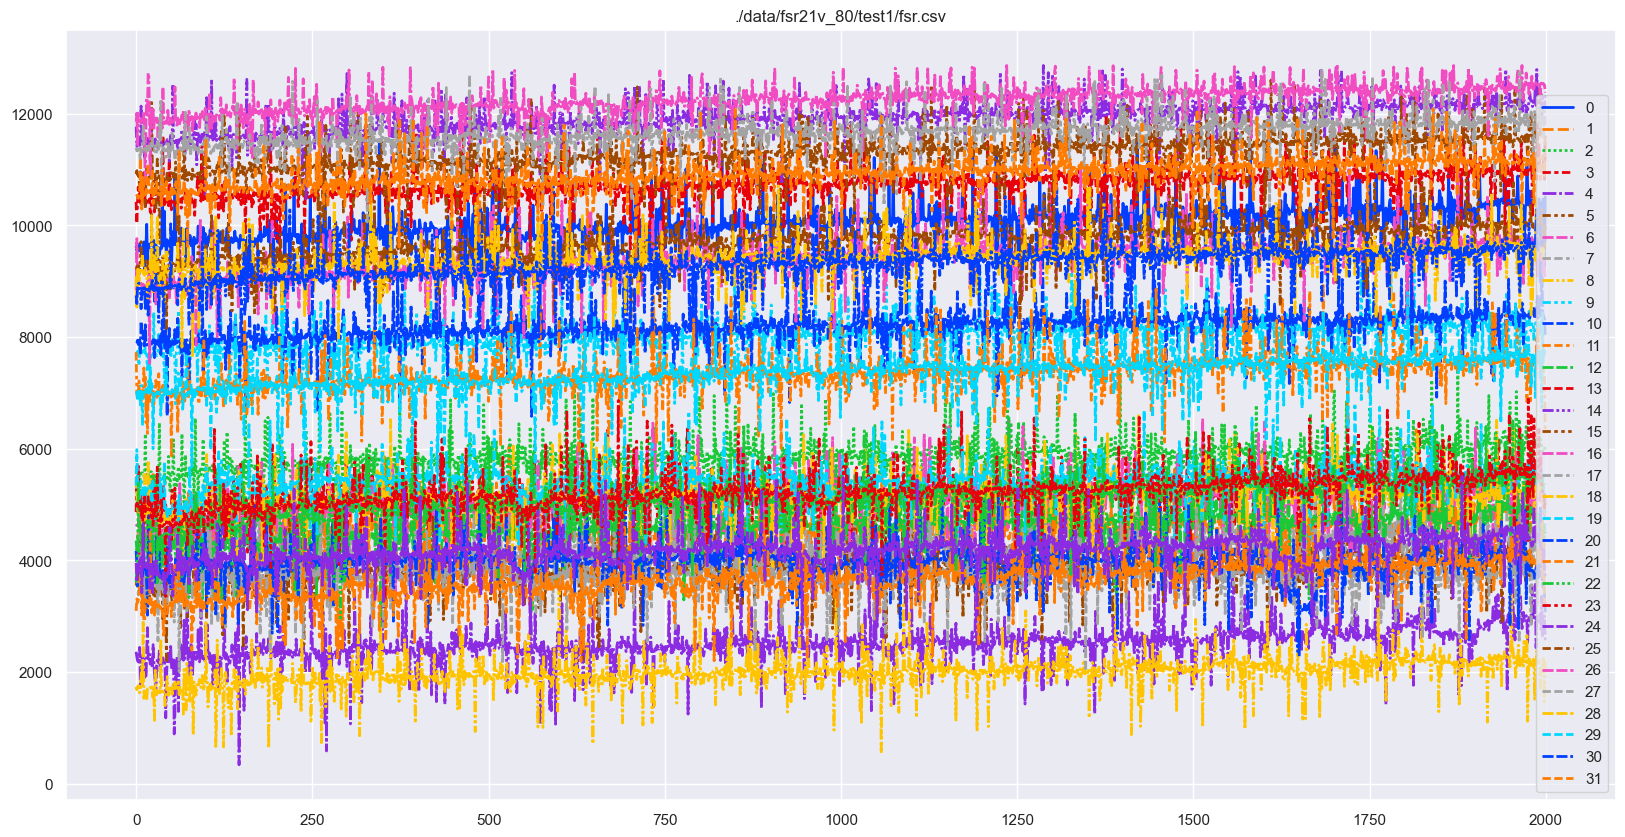

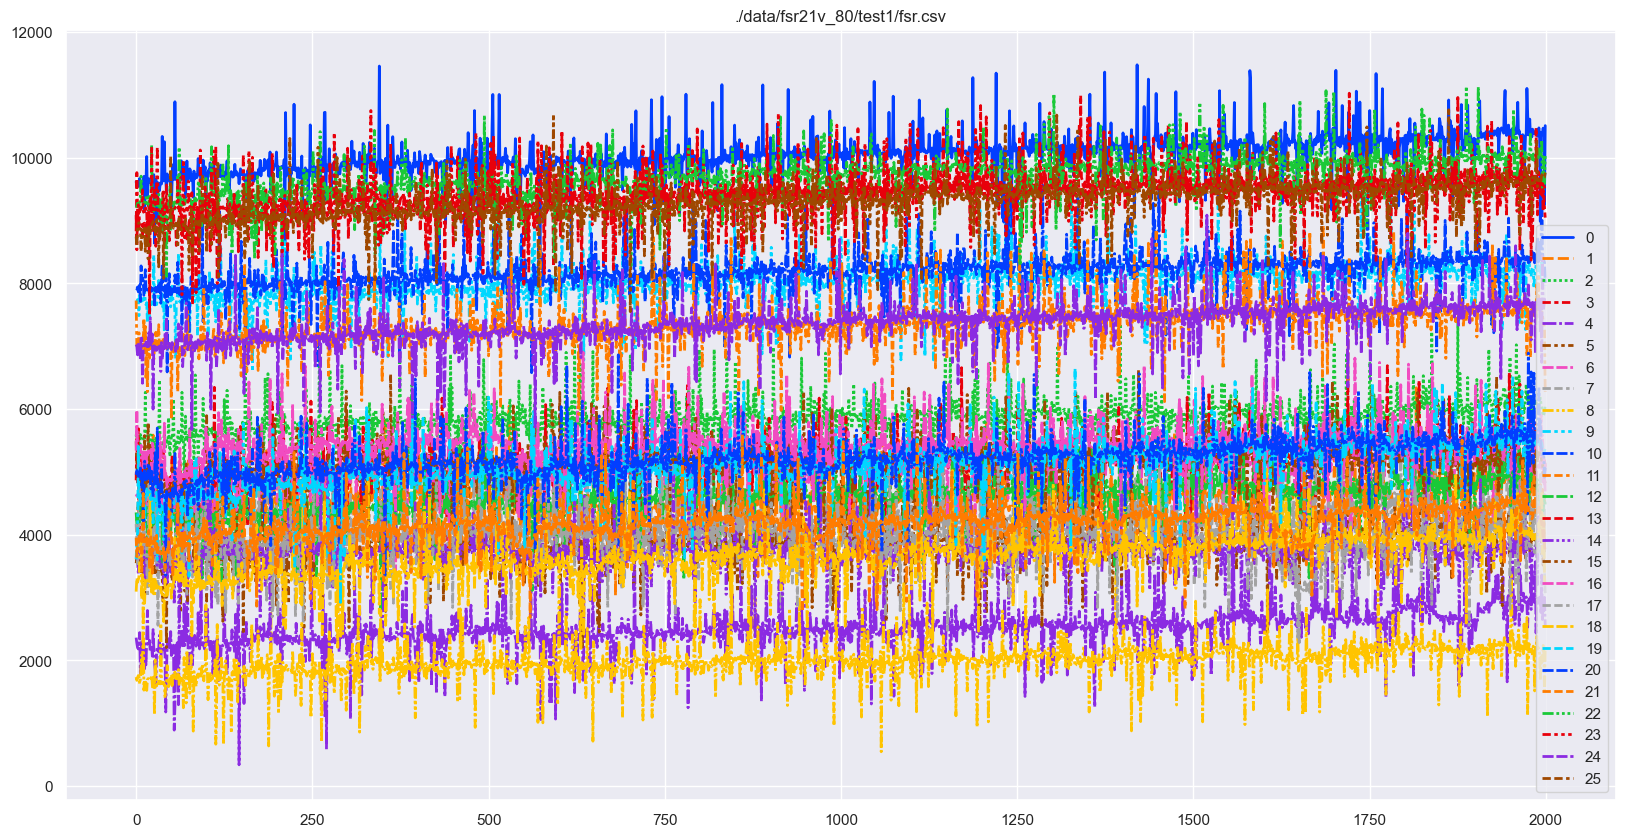

./data/fsr21v_25.csv
amp:  [20]
sens:  [10]
(6346, 7)
org values dimension:  (2000, 32)
selected FSR list:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30]
selected_values dimension:  (2000, 26)
sensor_mean shape:  (26,)
zero_indice:  []
org mean:  3128.698923076923
Compensation mean: 3128.698923076923


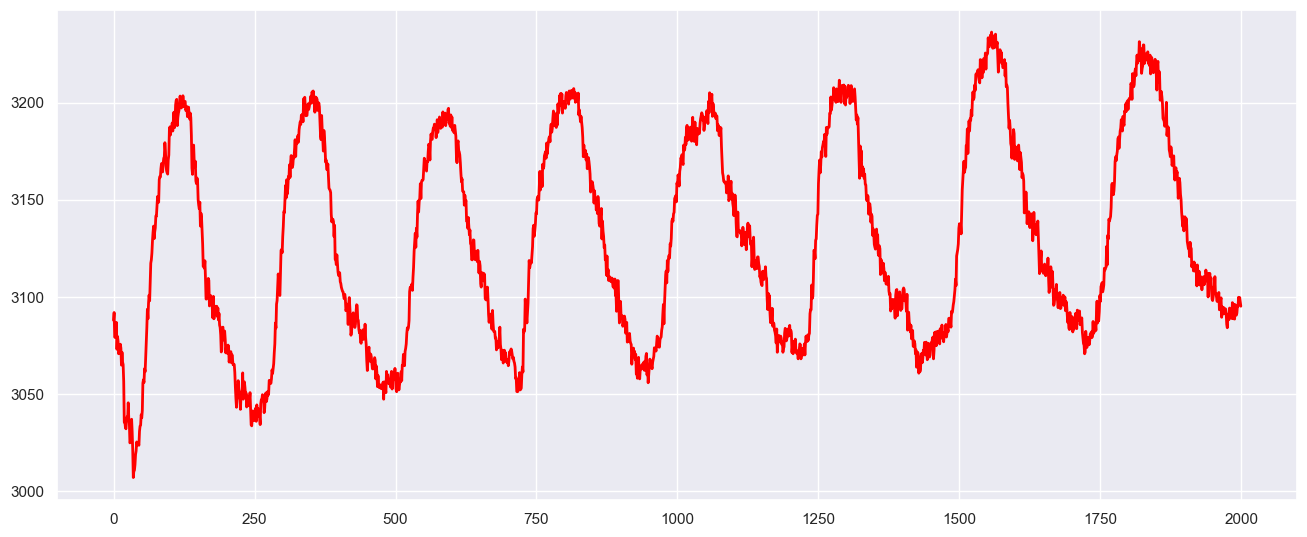

./data/fsr21v_80/test1/fsr.csv
amp:  [20]
sens:  [10]
(271479, 7)
org values dimension:  (2000, 32)
selected FSR list:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30]
selected_values dimension:  (2000, 26)
sensor_mean shape:  (26,)
zero_indice:  []
org mean:  5884.405461538462
Compensation mean: 3744.835635723077


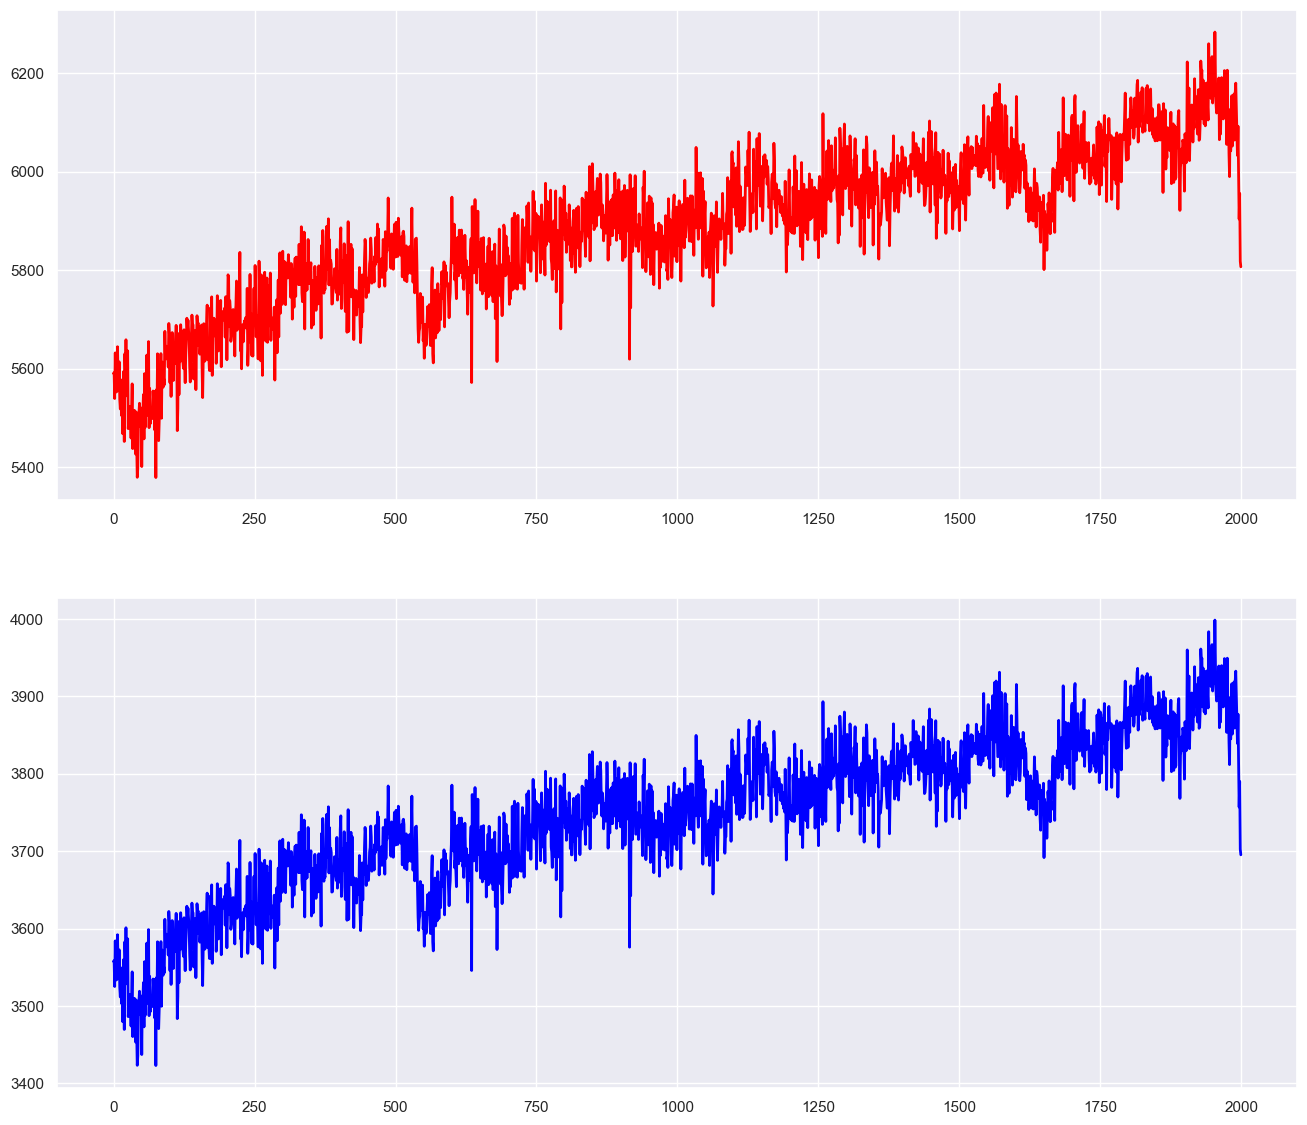

percentage of error:  119.69


In [49]:
# back_FSR = [1, 2, 3, 4, 5, 6, 7, 8, 17, 18, 19, 20, 21, 22, 23, 24]
# selected_FSR = [13, 14, 15, 16, 25, 26, 27, 28]+back_FSR

# all_FSR = list(range(0, 32))
# delete_FSR = [26, 14, 27, 15, 31, 13, 0, 25, 28, 16, 30] # 상위 센서를 뺌
# delete_FSR = [26, 14, 27, 15, 5, 24] # 상위 센서를 뺌
delete_FSR = [26, 14, 27, 15, 13, 31] # 상위 센서를 뺌
selected_FSR = [index for index in all_FSR if index not in delete_FSR]

# selected_FSR = all_FSR
RATIO_80 = 0.6364
OFFSET = 0
print('='*70)

path_source_list = [cfg['PATH']['path_21v_80']]
# folder_name_list = ['test1', 'test2', 'test3', 'test4', 'test5']
folder_name_list = ['test1']
data_range_list = [ [49500, 51500], [], [6000, 8000], [109000, 110000], [109000, 110000]] 

plotEachFSR(path_source_list,
            folder_name_list,
            data_range_list = data_range_list,
            upper_bound=None, lower_bound=None,
            selected_FSR = selected_FSR,
            isPlot=True,
            offset=OFFSET)
plt.show()




PATH_DATA_FSR = get_data_path(cfg, degree=25)

df_fsr = pd.read_csv(PATH_DATA_FSR)
# display(df_fsr.head())

df = convert_df_withoutKey(df_fsr)

mean_25 = calculate_statistics(df, without_ratio = True,
                     selected_FSR_list = selected_FSR,
                     start_point=2000, end_point=4000)
plt.show()


PATH_DATA_FSR = get_data_path(cfg, degree=80, FolderName='test1')

df_fsr = pd.read_csv(PATH_DATA_FSR)
# display(df_fsr.head())

df = convert_df_withoutKey(df_fsr)

mean_80 = calculate_statistics(df,
                     ratio=RATIO_80, without_ratio = False,
                     selected_FSR_list = selected_FSR,
                     start_point=49500, end_point=51500,
                     offset=OFFSET)
plt.show()


error_percentage = np.round(((mean_80)/mean_25)*100, 2)

print('='*70)
print('percentage of error: ', error_percentage)
print('='*70)

## FSR -30 vs 25

./data/fsr21v_m30/test1/fsr.csv
values: (3701, 32)
selected_FSR: [0, 6, 9, 10, 13, 14, 15, 16, 19, 22, 24, 25, 26, 27, 28, 30, 31]
np mean:
  [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 1.708000e+00 3.110000e+00 1.058520e+02 1.694920e+02 2.207680e+02
 3.663820e+02 4.902720e+02 6.949360e+02 6.957620e+02 7.229840e+02
 8.057360e+02 1.238208e+03 1.775284e+03 2.620132e+03 2.670082e+03
 3.512864e+03 4.313452e+03]
ascending sort FSR:
 [11 21 20 18 17 29 12  8 23  5  4  3  2  1  7 16 24 22 19 13  9  6 10 25
 28 30  0 31 26 15 14 27]
np min:
  [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.   64.  396. 1296. 1396. 2092. 2968.]
ascending sort FSR:
 [13 24 23 22 21 20 19 18 17 16 30 29 25 28 11 10  9  8  7  6  5  4  3  2
  1 12  0 31 1

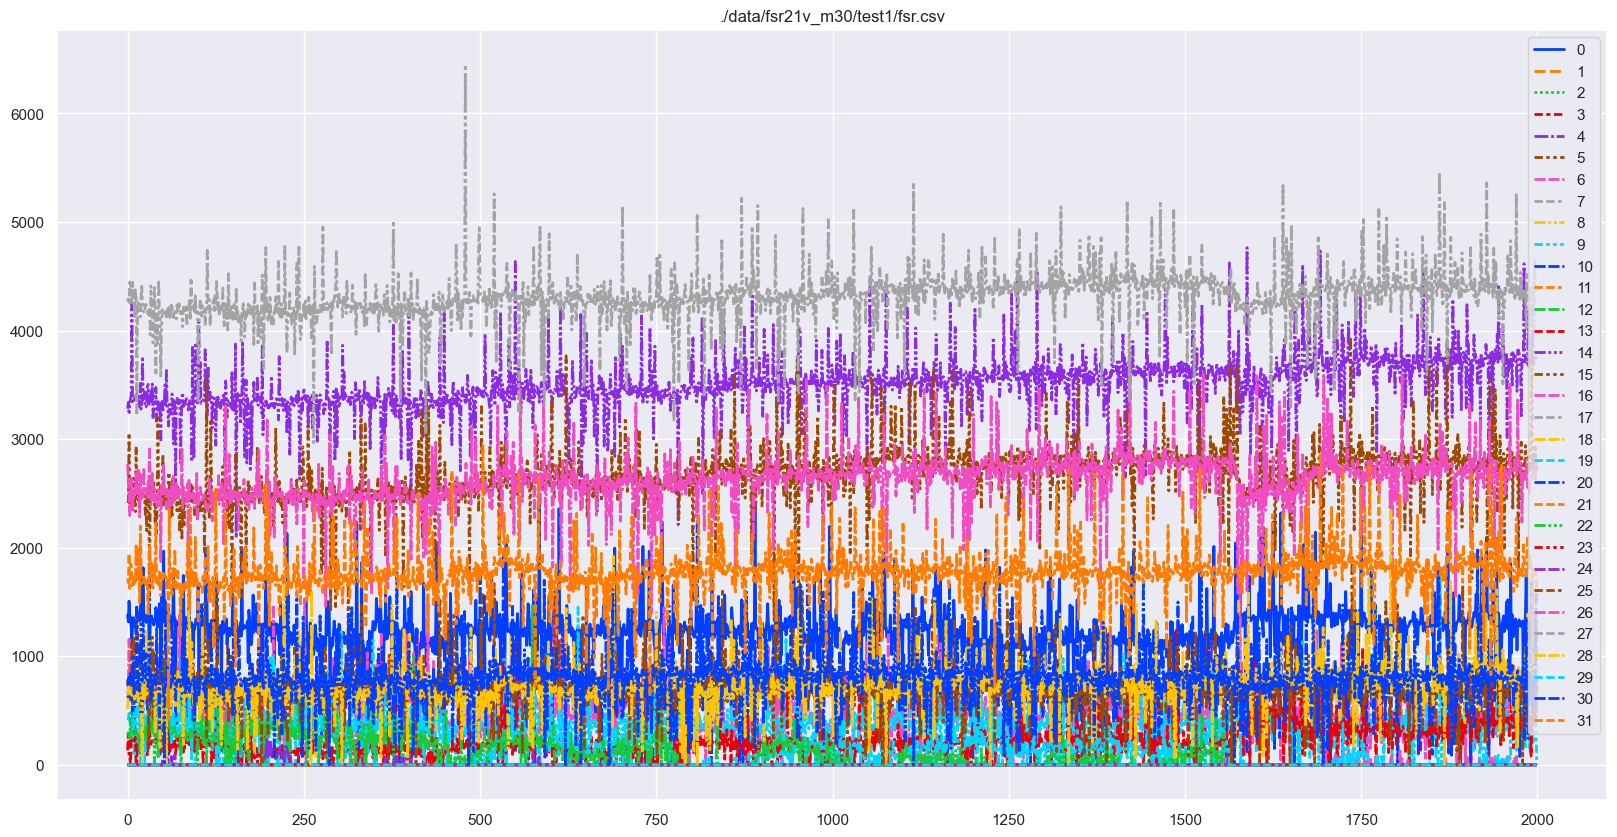

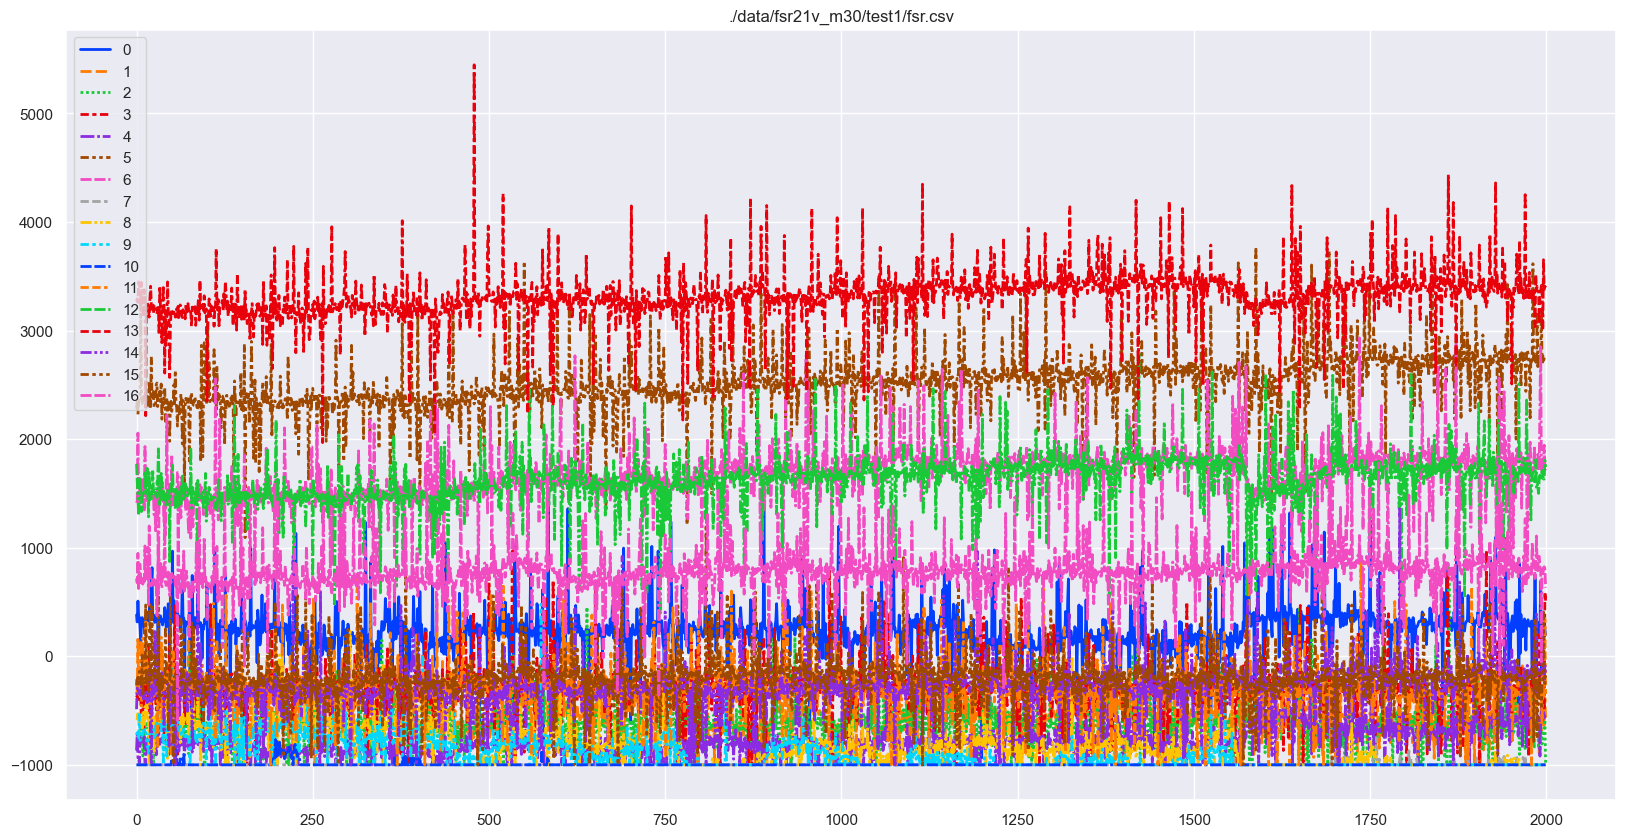

./data/fsr21v_25.csv
amp:  [20]
sens:  [10]
(6346, 7)
org values dimension:  (2000, 32)
selected FSR list:  [0, 6, 9, 10, 13, 14, 15, 16, 19, 22, 24, 25, 26, 27, 28, 30, 31]
selected_values dimension:  (2000, 17)
sensor_mean shape:  (17,)
zero_indice:  []
org mean:  3311.542117647059
Compensation mean: 3311.5421176470586


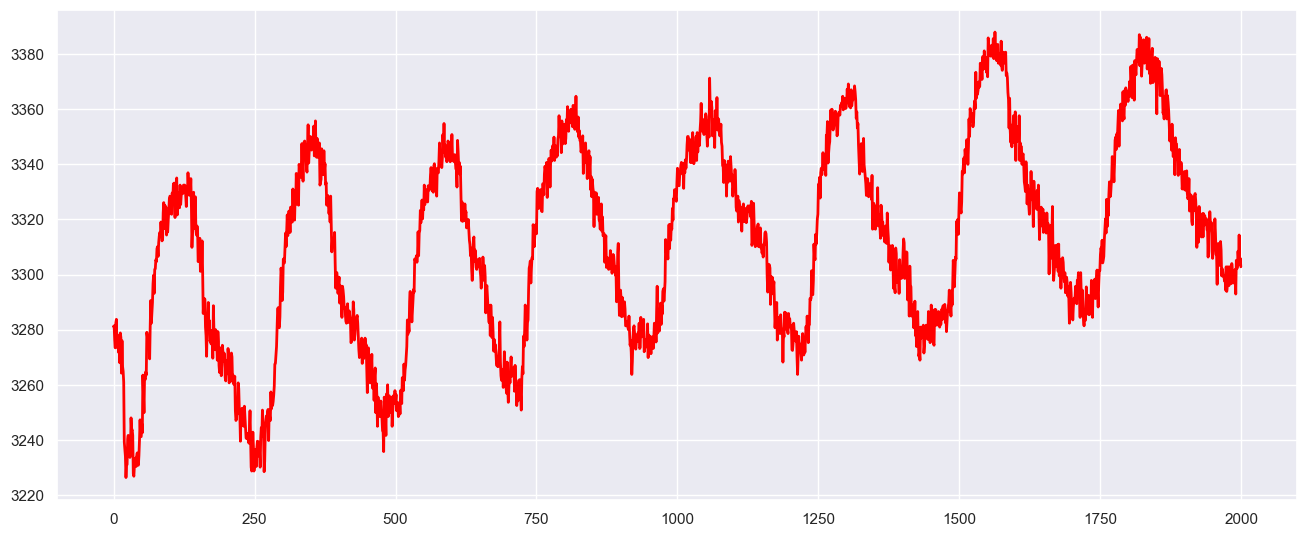

./data/fsr21v_m30/test1/fsr.csv
amp:  [20]
sens:  [10]
(3700, 7)
org values dimension:  (2000, 32)
selected FSR list:  [0, 6, 9, 10, 13, 14, 15, 16, 19, 22, 24, 25, 26, 27, 28, 30, 31]
selected_values dimension:  (2000, 17)
sensor_mean shape:  (17,)
zero_indice:  []
org mean:  1200.4131764705883
Compensation mean: 3094.064962352941


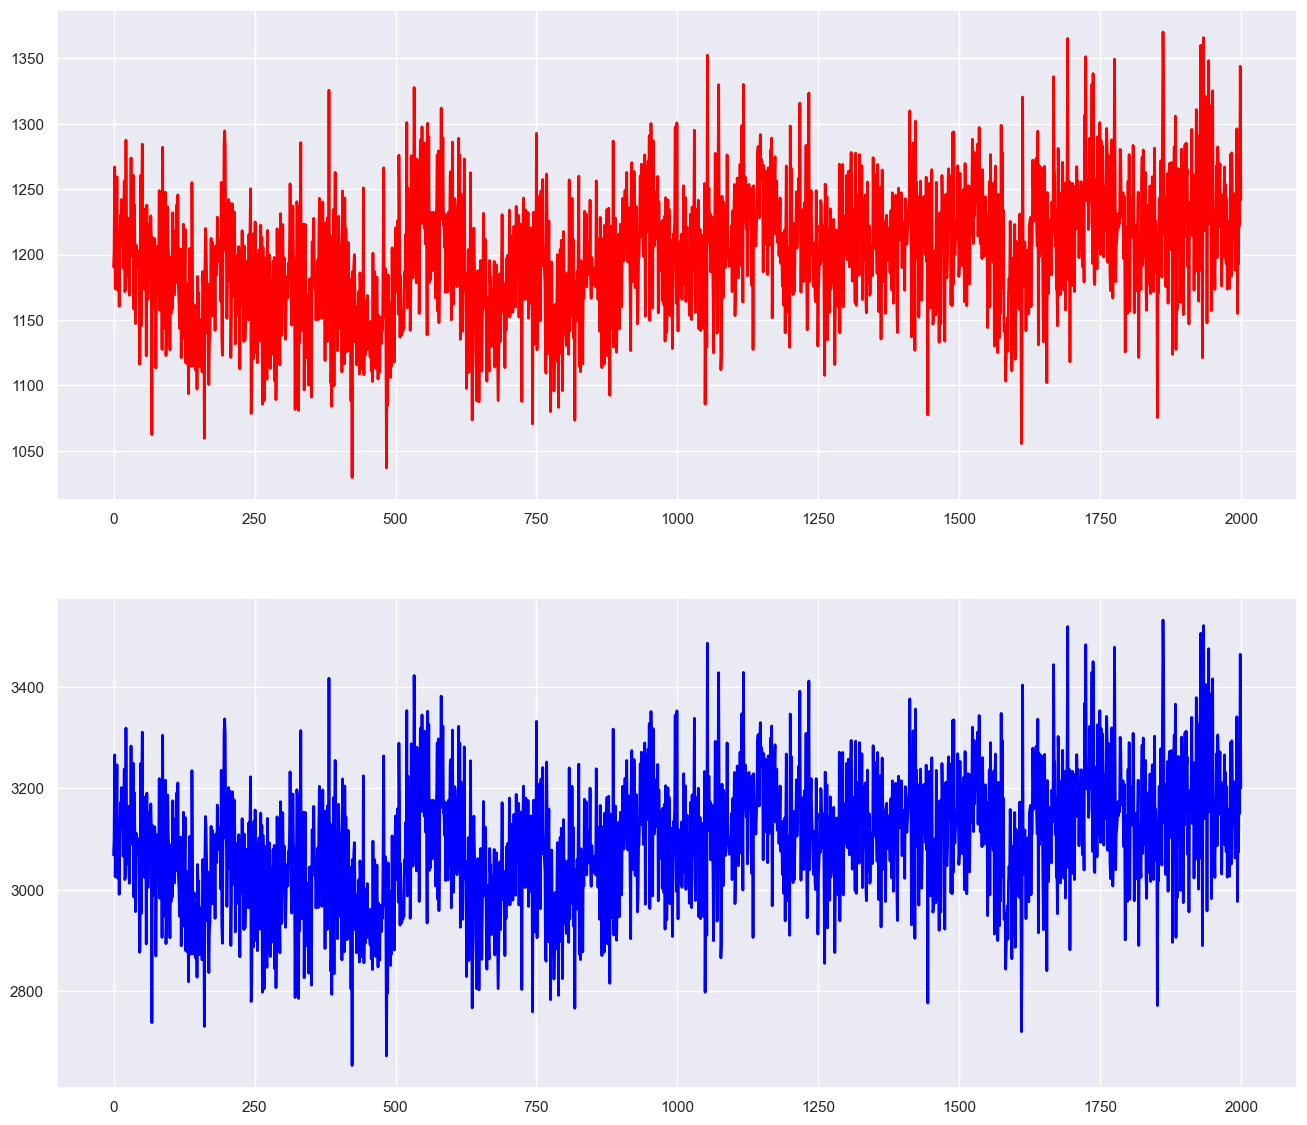

percentage of error:  93.43


In [41]:
# all_FSR = list(range(0, 32))
zero_FSR = [1, 2, 3, 4, 5, 7, 8, 11, 12, 17, 18, 20, 21, 23, 29]
# delete_FSR = zero_FSR + [16, 24, 22, 19]
delete_FSR = zero_FSR

selected_FSR = [index for index in all_FSR if index not in delete_FSR]

# selected_FSR = list(range(0, 32))

RATIO_m30 = 2.5775

print('='*70)

path_source_list = [cfg['PATH']['path_21v_m30']]
# folder_name_list = ['test1', 'test2', 'test3', 'test4', 'test5']
folder_name_list = ['test1']
data_range_list = [ [1000, 3000], [500, 2500], [1500, 3500], [1000, 3000], [1000, 3000]] 

plotEachFSR(path_source_list,
            folder_name_list,
            data_range_list = data_range_list,
            upper_bound=None, lower_bound=None,
            selected_FSR = selected_FSR,
            isPlot=True)
plt.show()


PATH_DATA_FSR = get_data_path(cfg, degree=25)

df_fsr = pd.read_csv(PATH_DATA_FSR)
# display(df_fsr.head())

df = convert_df_withoutKey(df_fsr)

mean_25 = calculate_statistics(df, without_ratio = True,
                     selected_FSR_list = selected_FSR,
                     start_point=2000, end_point=4000)
plt.show()


PATH_DATA_FSR = get_data_path(cfg, degree=-30, FolderName='test1')

df_fsr = pd.read_csv(PATH_DATA_FSR)
# display(df_fsr.head())

df = convert_df_withoutKey(df_fsr)

mean_m30 = calculate_statistics(df,
                     ratio=RATIO_m30, without_ratio = False,
                     selected_FSR_list = selected_FSR,
                     start_point=1000, end_point=3000)
plt.show()


error_percentage = np.round((mean_m30/mean_25)*100, 2)

print('='*70)
print('percentage of error: ', error_percentage)
print('='*70)



# FSR selection

In [9]:
from data_preprocessing import get_data_path
from data_preprocessing import convert_df_withoutKey, calculate_statistics
import pandas as pd
import matplotlib.pyplot as plt

## FSR 21v 80

./data/fsr21v_80/test1/fsr.csv
amp:  [20]
sens:  [10]
(271479, 7)
org values dimension:  (271479, 32)
org mean:  615.0691972891594
Compensation mean: 615.0691972891594


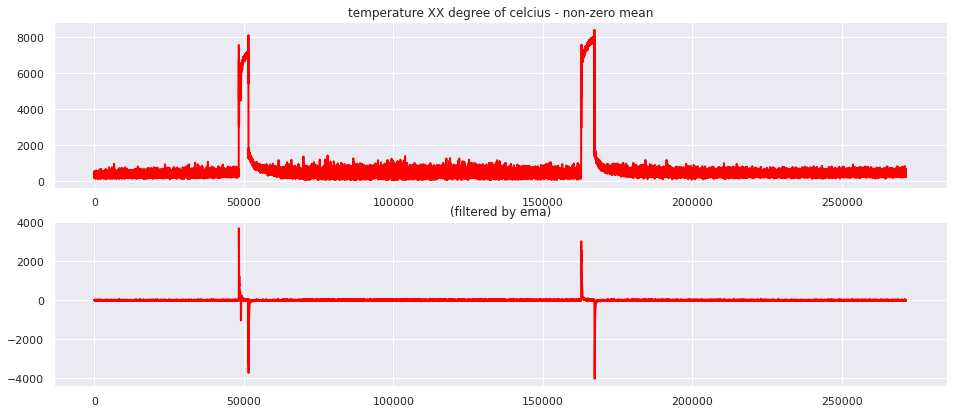

./data/fsr21v_80/test2/fsr.csv
./data/fsr21v_80/test3/fsr.csv
amp:  [20]
sens:  [10]
(10080, 7)
org values dimension:  (10080, 32)
org mean:  3824.9244563157413
Compensation mean: 3824.9244563157413


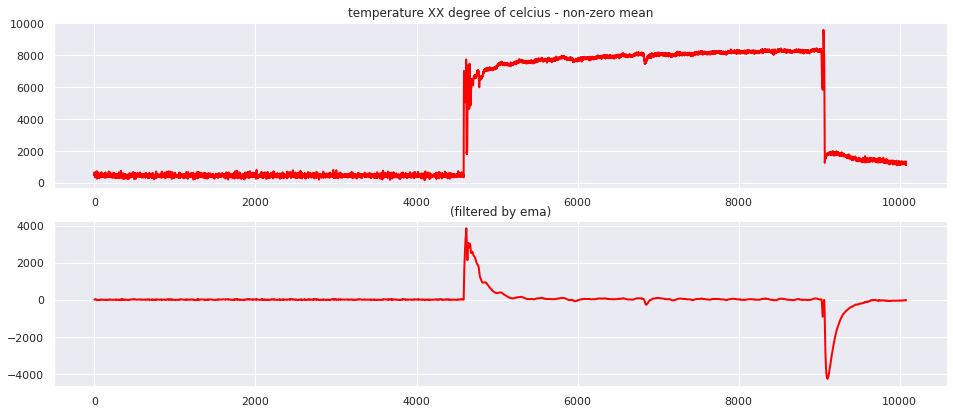

./data/fsr21v_80/test4/fsr.csv
amp:  [20]
sens:  [10]
(112703, 7)
org values dimension:  (112703, 32)
org mean:  764.3202419416557
Compensation mean: 764.3202419416557


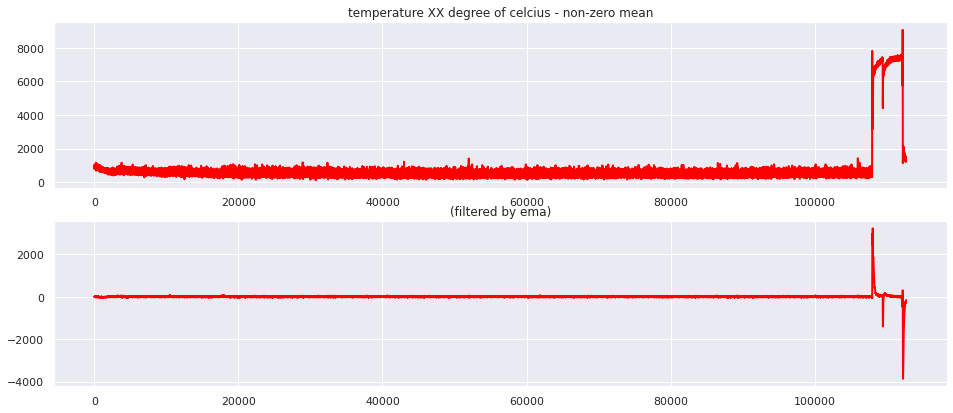

./data/fsr21v_80/test5/fsr.csv
amp:  [20]
sens:  [10]
(112984, 7)
org values dimension:  (112984, 32)
org mean:  755.1928773556391
Compensation mean: 755.1928773556391


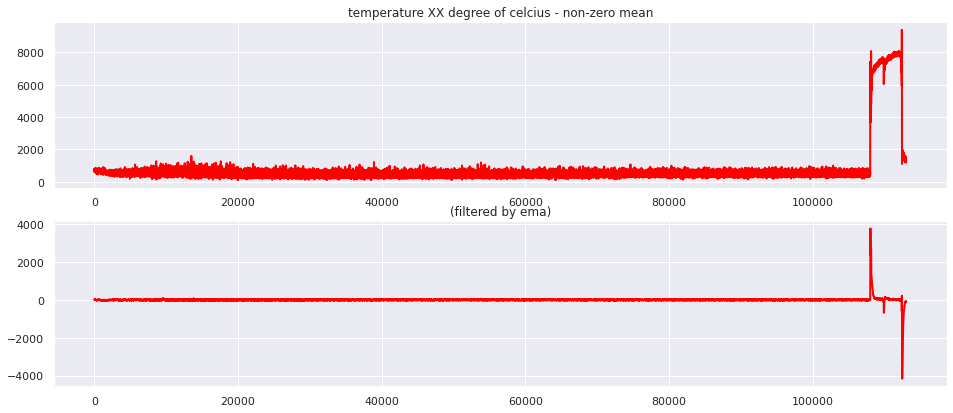

In [10]:
for testNo in range(1, 6):
    FolderName = 'test'+str(testNo)
    
    PATH_DATA_FSR = get_data_path(cfg, degree=80, FolderName=FolderName)

    if not os.path.exists(PATH_DATA_FSR):
        continue

    df_fsr = pd.read_csv(PATH_DATA_FSR)
    # display( df_fsr.head() )


    from data_preprocessing import convert_df_withoutKey
    df = convert_df_withoutKey(df_fsr)
    
    from data_preprocessing import calculate_statistics
    RATIO = 0.6977
    calculate_statistics(df,
                        ratio = RATIO, without_ratio=True,
                        start_point=None, end_point=None)
    plt.show()

## FSR 21v -30

./data/fsr21v_m30/test1/fsr.csv
amp:  [20]
sens:  [10]
(3700, 7)
org values dimension:  (3700, 32)
org mean:  1477.7497154617527
Compensation mean: 1477.7497154617527


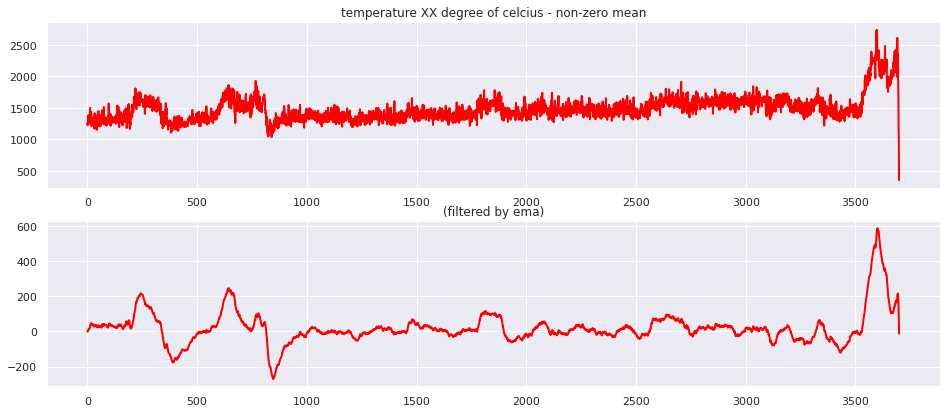

./data/fsr21v_m30/test2/fsr.csv
amp:  [20]
sens:  [10]
(2662, 7)
org values dimension:  (2662, 32)
org mean:  1119.7616603678873
Compensation mean: 1119.7616603678873


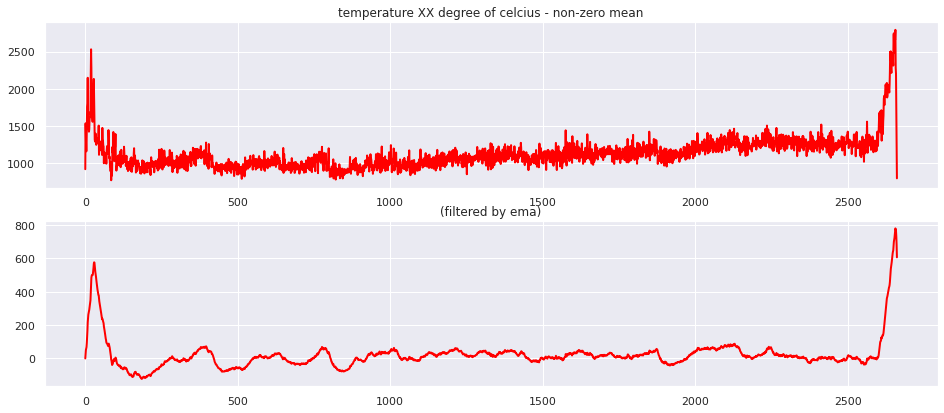

./data/fsr21v_m30/test3/fsr.csv
amp:  [20]
sens:  [10]
(4419, 7)
org values dimension:  (4419, 32)
org mean:  1344.8453345344067
Compensation mean: 1344.8453345344067


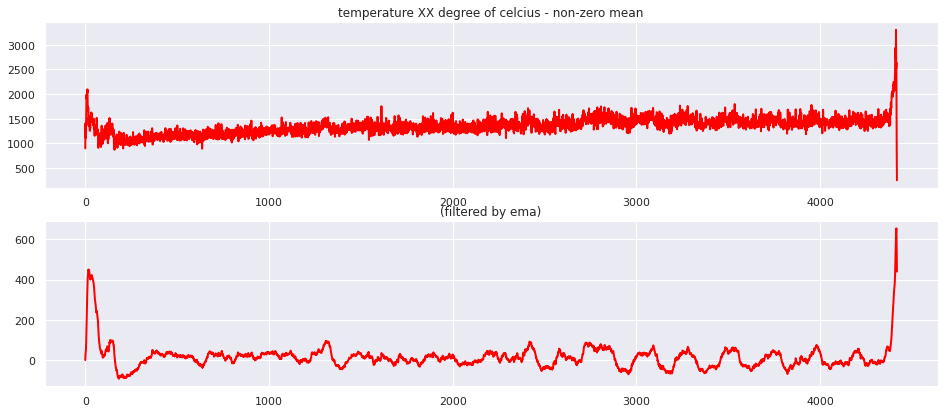

./data/fsr21v_m30/test4/fsr.csv
amp:  [20]
sens:  [10]
(4628, 7)
org values dimension:  (4628, 32)
org mean:  1209.998408085424
Compensation mean: 1209.998408085424


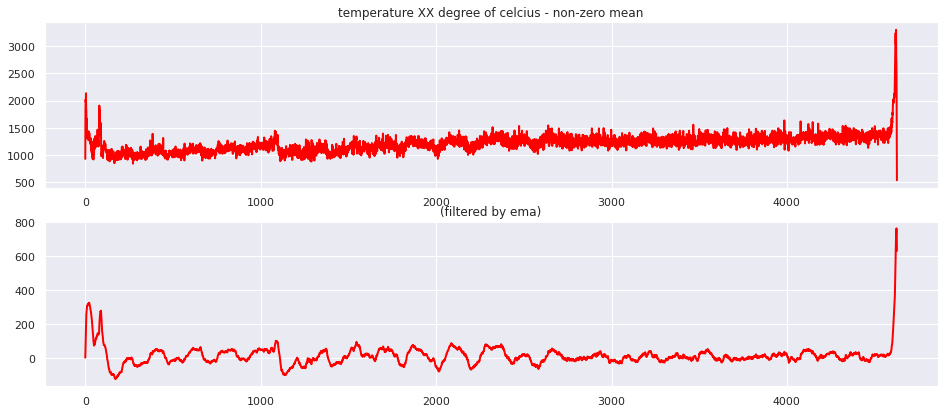

./data/fsr21v_m30/test5/fsr.csv
amp:  [20]
sens:  [10]
(4246, 7)
org values dimension:  (4246, 32)
org mean:  1318.4102392579032
Compensation mean: 1318.4102392579032


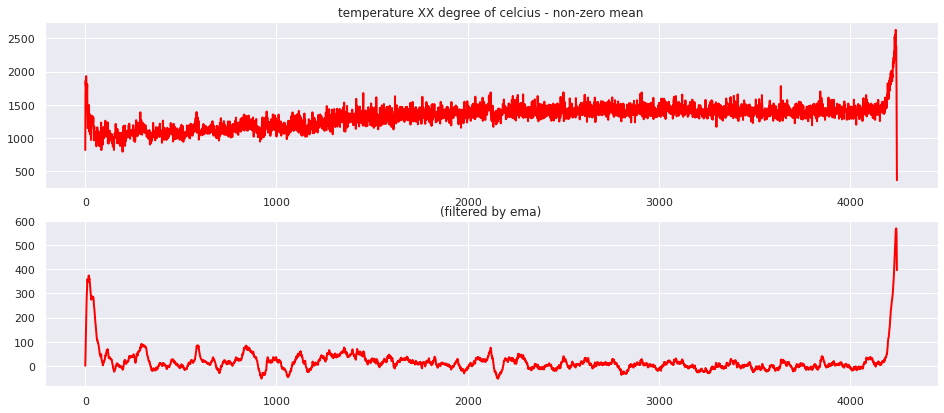

In [11]:
for testNo in range(1, 6):
    PATH_SOURCE = cfg['PATH']['path_21v_m30']
    FOLDER_NAME = 'test'+str(testNo)
    CURRENT_DATA = os.path.join(PATH_SOURCE, FOLDER_NAME)

    # RATIO = 0.5464516840547095

    PATH_DATA_FSR = f'{CURRENT_DATA}/fsr.csv'

    print(PATH_DATA_FSR)

    if not os.path.exists(PATH_DATA_FSR):
        continue
    
    df_fsr = pd.read_csv(PATH_DATA_FSR)
    # display( df_fsr.head() )


    from data_preprocessing import convert_df_withoutKey
    df = convert_df_withoutKey(df_fsr)
    
    from data_preprocessing import calculate_statistics
    RATIO = 0.5464516840547095
    calculate_statistics(df,
                        ratio = RATIO, without_ratio=True,
                        start_point=None, end_point=None)
    plt.show()